In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten, InputLayer, Conv2D, UpSampling2D
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from PIL import Image, ImageChops, ImageOps
import os
from keras.datasets import cifar10
from sklearn.utils import shuffle

In [ ]:
img_size_x = 32
img_size_y = 32

In [ ]:
(y_train, y_train_lables), (y_test, y_test_lables) = cifar10.load_data()

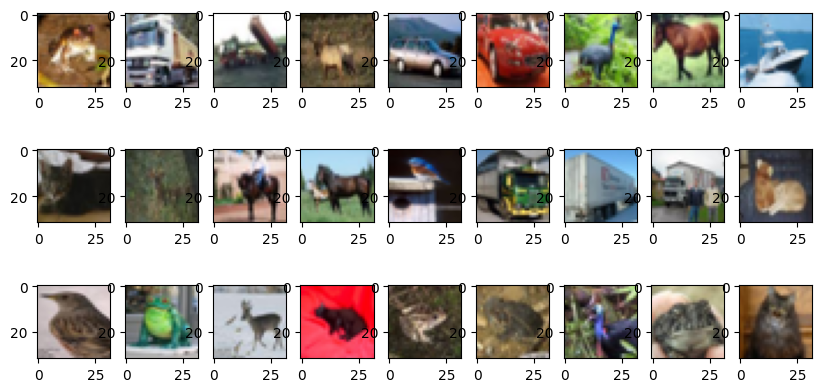

In [ ]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    plt.imshow(y_train[i])

In [ ]:
def convert_img_to_bw(x):
    x_img = Image.fromarray(x.astype(np.uint8))
    # x_img = x_img.resize((img_size_x, img_size_y))
    x_bw = np.array(x_img.convert('L'))
    return x_bw

def convert_imgs_to_bw(imgs):
    x_t = []
    for img in imgs:
        x_t.append(convert_img_to_bw(img))
    return x_t

In [ ]:
y_test = np.array(y_test[:1000], np.float32)
y_train = np.array(y_train[:200], np.float32)

x_test = convert_imgs_to_bw(y_test)
x_test = np.array(x_test, np.float32) / 255.0

x_train = convert_imgs_to_bw(y_train)
x_train = np.array(x_train, np.float32) / 255.0

y_test = y_test / 255.0
y_train = y_train / 255.0

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (img_size_x, img_size_y, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 16, 16, 8)         80        
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 up_sampling2d_9 (UpSampling  (None, 8, 8, 32)        

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=4, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
50/50 [==============================] - 3s 41ms/step - loss: 0.1228 - val_loss: 0.0613
Epoch 2/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0473 - val_loss: 0.0369
Epoch 3/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0320 - val_loss: 0.0287
Epoch 4/500
50/50 [==============================] - 2s 40ms/step - loss: 0.0274 - val_loss: 0.0256
Epoch 5/500
50/50 [==============================] - 3s 65ms/step - loss: 0.0245 - val_loss: 0.0237
Epoch 6/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0231 - val_loss: 0.0223
Epoch 7/500
50/50 [==============================] - 2s 34ms/step - loss: 0.0227 - val_loss: 0.0232
Epoch 8/500
50/50 [==============================] - 2s 34ms/step - loss: 0.0216 - val_loss: 0.0209
Epoch 9/500
50/50 [==============================] - 2s 34ms/step - loss: 0.0208 - val_loss: 0.0208
Epoch 10/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0203 - val_loss: 0.0206

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 1s 19ms/step - loss: 0.0154


0.015389522537589073

In [ ]:
y_pred = model.predict(x_test)

32/32 [==============================] - 1s 19ms/step


In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=4, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
50/50 [==============================] - 3s 67ms/step - loss: 0.0057 - val_loss: 0.0151
Epoch 2/500
50/50 [==============================] - 2s 32ms/step - loss: 0.0058 - val_loss: 0.0156
Epoch 3/500
50/50 [==============================] - 2s 33ms/step - loss: 0.0058 - val_loss: 0.0151
Epoch 4/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0058 - val_loss: 0.0152
Epoch 5/500
50/50 [==============================] - 2s 33ms/step - loss: 0.0057 - val_loss: 0.0152
Epoch 6/500
50/50 [==============================] - 2s 39ms/step - loss: 0.0056 - val_loss: 0.0152
Epoch 7/500
50/50 [==============================] - 2s 43ms/step - loss: 0.0057 - val_loss: 0.0153
Epoch 8/500
50/50 [==============================] - 2s 49ms/step - loss: 0.0058 - val_loss: 0.0152
Epoch 9/500
50/50 [==============================] - 2s 34ms/step - loss: 0.0057 - val_loss: 0.0154
Epoch 10/500
50/50 [==============================] - 2s 33ms/step - loss: 0.0057 - val_loss: 0.0152

In [ ]:
print(y_pred[0])

[[[0.39159554 0.43601018 0.4738414 ]
  [0.4242994  0.4900462  0.5416026 ]
  [0.40613303 0.4595754  0.5150328 ]
  ...
  [0.41794115 0.4102302  0.30540943]
  [0.38331112 0.40189648 0.313001  ]
  [0.3673224  0.38523632 0.30765402]]

 [[0.4001903  0.4567505  0.5245973 ]
  [0.43030304 0.4761851  0.5778242 ]
  [0.41716197 0.48542994 0.5664458 ]
  ...
  [0.42027858 0.43532407 0.3007898 ]
  [0.394918   0.40451953 0.30808553]
  [0.38128147 0.41155407 0.35280666]]

 [[0.39967299 0.462823   0.52525747]
  [0.41445616 0.48796397 0.58941984]
  [0.4056126  0.49791995 0.5898438 ]
  ...
  [0.42090833 0.42844754 0.3084219 ]
  [0.40371254 0.4094028  0.3201358 ]
  [0.37750405 0.38982463 0.34131575]]

 ...

 [[0.434526   0.4105773  0.3603069 ]
  [0.40696594 0.40863872 0.36155668]
  [0.33506963 0.33471146 0.32971734]
  ...
  [0.35079145 0.31259012 0.20841798]
  [0.33937034 0.28938708 0.18143474]
  [0.33915383 0.26211953 0.16498655]]

 [[0.5008995  0.44500068 0.4140014 ]
  [0.46138626 0.4342779  0.40699357]


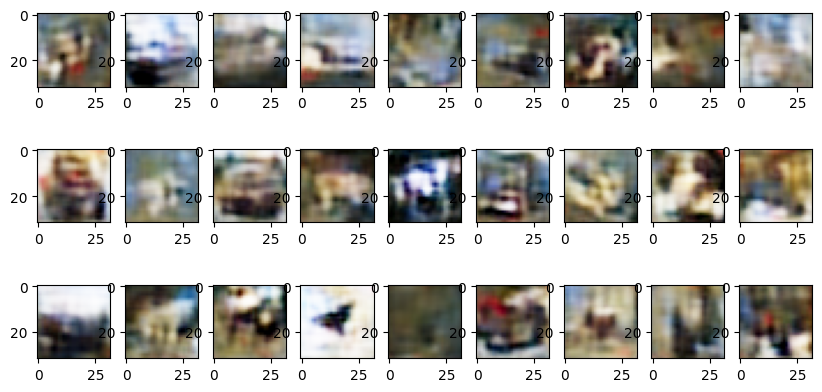

In [ ]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    plt.imshow(y_pred[i])

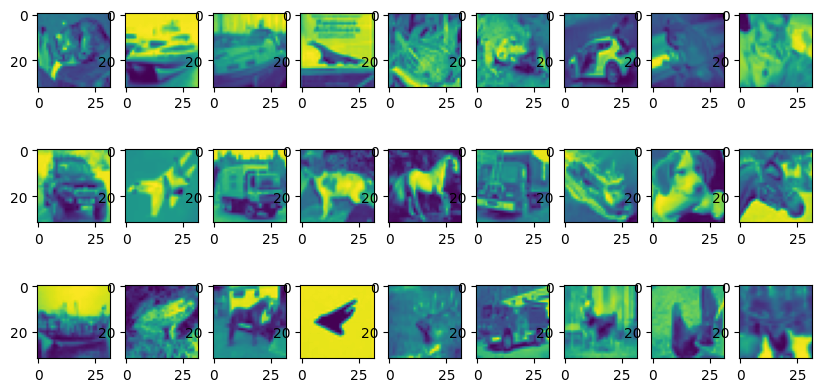

In [ ]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    plt.imshow(x_test[i])

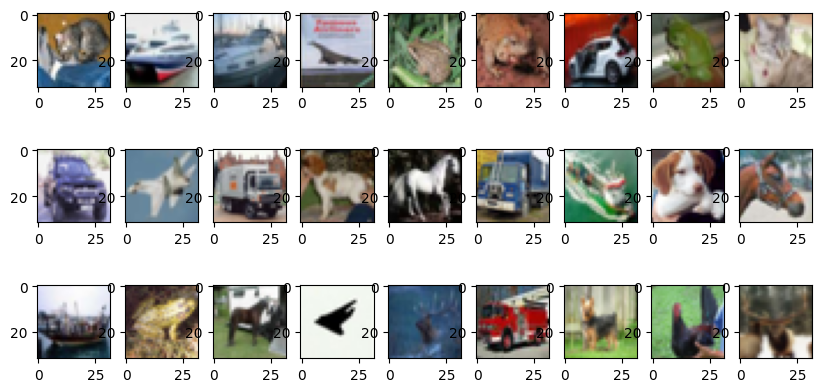

In [ ]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    plt.imshow(y_test[i])